<a href="https://colab.research.google.com/github/Joshuaiwuoha/KPMG-virtual-internship/blob/main/KPMG_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data_df = pd.ExcelFile("/content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx")

In [ ]:
data_df

In [ ]:
#getting the names of the files in data_df
sheet_names = data_df.sheet_names
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [ ]:
# Create a dictionary to store DataFrames for each sheet
data_frame = {}
for sheet in sheet_names:
   # Skip the first row to remove irrelevant content
  data_frame[sheet] = data_df.parse(sheet,skiprows = 1)


<ipython-input-5-1a152a92c113>:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data_frame[sheet] = data_df.parse(sheet,skiprows = 1)
<ipython-input-5-1a152a92c113>:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data_frame[sheet] = data_df.parse(sheet,skiprows = 1)


In [ ]:
for sheet_name, df in data_frame.items():
    globals()[sheet_name] = df

In [ ]:
transactions_df = Transactions
newcustomer_df = NewCustomerList
demo_df = CustomerDemographic
address_df = CustomerAddress

**Transactions dataset**

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

From here we can see that there are missing values and also the **product_first_sold_date** needs to be converted to a datetime object.


In [ ]:
transactions_df.shape

(20000, 13)

In [ ]:
transactions_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


The **product_first_sold_date** column has the dates in the Excel serial date format, which represents the number of days since January 1, 1900 (for Windows) or January 1, 1904 (for Mac) and so we will take steps to convert it into a human readable format.

In [ ]:
print(f'There are {transactions_df.duplicated().sum()} duplicated rows in the dataset')

There are 0 duplicated rows in the dataset


There are no duplicated rows.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

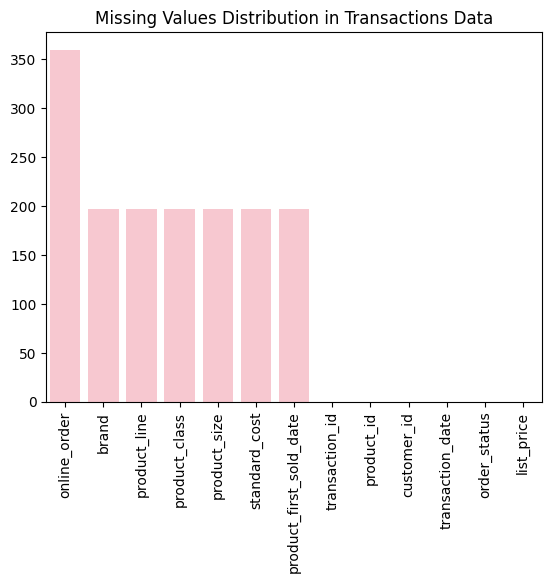

In [ ]:
sns.barplot(x = transactions_df.isnull().sum().sort_values(ascending = False).index, y = transactions_df.isnull().sum().sort_values(ascending = False).values, color = 'pink')
plt.xticks(rotation = 90)
plt.title("Missing Values Distribution in Transactions Data" );

Clearly seen from the graph, is the distribution of the columns with missing data. We will drop these columns from the dataset .

In [ ]:
#get the list of categorical columns
cat_cols = list(transactions_df.select_dtypes(include = 'object'))
cat_cols

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

In [ ]:
#unique values for the categorical columns
for each in cat_cols:
  print(each,":",transactions_df[each].unique())

order_status : ['Approved' 'Cancelled']
brand : ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line : ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class : ['medium' 'low' 'high' nan]
product_size : ['medium' 'large' 'small' nan]


In [ ]:
#transactions_df['product_first_sold_date'] = pd.to_datetime (transactions_df['product_first_sold_date'])

In [ ]:
#check to see if the dates were transformed correctly
#print(transactions_df['product_first_sold_date'].agg(['max','min']))

Apparently, the pd.to_datetime function does not convert the **product_first_sold_date** correctly as the dates in the column are the same.


In [ ]:
#drop the rows with empty values
transactions_df.dropna(inplace = True)

In [ ]:
from datetime import datetime, timedelta
base_date = pd.datetime(1900, 1, 1)  # Excel's base date
transactions_df['product_first_sold_date'] = transactions_df['product_first_sold_date'].apply(lambda x: base_date + timedelta(days=x-2))



<ipython-input-19-d7505d9973b9>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  base_date = pd.datetime(1900, 1, 1)  # Excel's base date


In [ ]:
print(transactions_df['product_first_sold_date'].agg(['max','min']))

max   2016-12-06
min   1991-01-21
Name: product_first_sold_date, dtype: datetime64[ns]


# **Customer Demographics**

In [ ]:
demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
cols = demo_df.isnull().sum()
order = cols.sort_values(ascending = False).index

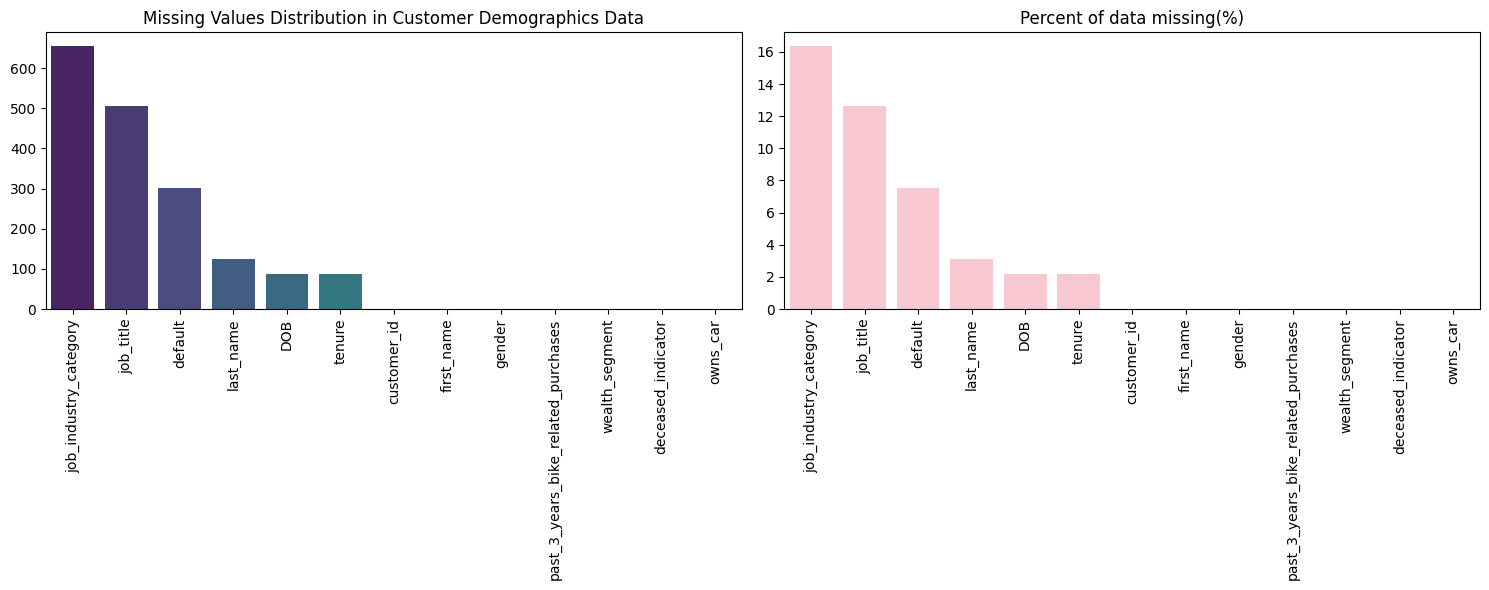

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (15,6))
sns.barplot(x = cols.index, y = cols.values, order = order, palette = 'viridis', ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
ax[0].set_title('Missing Values Distribution in Customer Demographics Data')


sns.barplot(x = demo_df.isnull().sum().sort_values(ascending = False).index, y = (demo_df.isnull().sum().sort_values(ascending = False).values)/demo_df.shape[0]*100,color = 'pink', ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
ax[1].set_title('Percent of data missing(%)')

plt.tight_layout();

In [ ]:
print(f'There are {demo_df.duplicated().sum()} duplicated rows in the dataset')

There are 0 duplicated rows in the dataset


In [ ]:
#get the unique values for the categorical columns to see if we can detect some errors
cat_cols = list(demo_df.select_dtypes(include = 'object'))
for each in cat_cols:
  print(each, ':', demo_df[each].unique())

The First thing I detected was that the values in the **Gender** column were not standardized and so we would have to solve this later on. The **default** column contains values that make no sense and so they will be dropped.

In [ ]:
#dropping the default column
demo_df.drop('default', axis = 1, inplace = True)

In [ ]:
#creating a mmapping to standardize the gender column
mapping = {'F':'Female', 'Male': 'Male', 'Female':'Female', 'U': 'Unknown', 'Femal' : 'Female', 'M': 'Male'}
demo_df['gender'] =  demo_df['gender'].replace(mapping)


In [ ]:
#i have assigned the value 'u' to 'unknown'
demo_df.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

**ADDRESSES**

In [ ]:
#using the .info() to see the datatypes and get a sense of the missing data count
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
address_df.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


Two things we can deduce from here is that:
1. The postcodes are all correct as the minimum and maximum values are both 4 digit numbers, inline with the standard length of postcodes in Australia.(note that according to the **country** column, all the customers are in Australia)
2. The **property_valuation** column is a rating like feature between 1 and 12.

In [ ]:
#unique value for the categorical columns
cat_cols = list(address_df.select_dtypes(include = 'object'))
for each in cat_cols:
  print(each, ':', address_df[each].unique())

address : ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']
state : ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
country : ['Australia']


The values in the **state** column needs to be standardized so that only state abbreviations are in it.

In [ ]:
mapping = {'New South Wales': 'NSW', 'QLD': 'QLD', 'VIC': 'VIC','NSW': 'NSW','Victoria':'VIC'}
address_df['state'] = address_df.state.replace(mapping)

NEW CUSTOMERS

In [ ]:
newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

I will have a look at the unnamed columns to try to make sense of what it might be. We also have missing data in this datset.

In [ ]:
newcustomer_df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747340,0.839005,0.942673,0.870514,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.205082,0.248858,0.294832,0.280891,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.712500,0.658750,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.912500,0.842625,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.031875,1.142969,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [ ]:
import numpy as np

In [ ]:
#slice out the unnamed columns
newcustomer_df[np.array(list(newcustomer_df.columns))[np.r_[16:21]]]

,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,0.56,0.7000,0.875000,0.743750,1
1,0.89,0.8900,1.112500,0.945625,1
2,1.01,1.0100,1.010000,1.010000,1
3,0.87,1.0875,1.087500,1.087500,4
4,0.52,0.5200,0.650000,0.650000,4
...,...,...,...,...,...
995,0.79,0.7900,0.790000,0.790000,996
996,0.76,0.7600,0.950000,0.807500,997
997,0.85,1.0625,1.062500,1.062500,997
998,1.09,1.3625,1.362500,1.158125,997


In [ ]:
#they make no sense and so i wil drop them
newcustomer_df.drop(list(np.array(list(newcustomer_df.columns))[np.r_[16:21]]), axis =1, inplace = True)

In [ ]:
#have a look at the date of birth column to make sure they have been interpreted correctly
newcustomer_df.DOB

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 1000, dtype: datetime64[ns]

In [ ]:
#unique value for the categorical columns
cat_cols = np.array(list(newcustomer_df.select_dtypes(include = 'object')))[np.r_[2,4:8,9:11]]
for each in cat_cols:
  print(each, ':', newcustomer_df[each].unique())

gender : ['Male' 'Female' 'U']
job_industry_category : ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
wealth_segment : ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator : ['N']
owns_car : ['Yes' 'No']
state : ['QLD' 'NSW' 'VIC']
country : ['Australia']


In [ ]:
transactions_df.to_csv('transactions.csv')
demo_df.to_csv('customerdemographics.csv')
newcustomer_df.to_csv('newcustomer.csv')
address_df.to_csv('address.csv')